# Logitic regression on ICAN clinical data

**Objective:** implement a logistic regression model with the simulated ICAN clinical data.

## Library importation

In [1]:
library(finalfit)
library(knitr)
library(ggplot2)

Warning message:
"package 'knitr' was built under R version 3.6.3"


## Data loading

In [2]:
ican <- read.csv("simulated_ican_clinical_data.csv", sep = "#", encoding = "utf8")
dim(ican)

[1] 2505   28

In [3]:
ican["adjusted_size_ratio"] <- as.factor(ifelse(is.na(ican$adjusted_size_ratio), NA, 
                                                ifelse(ican$adjusted_size_ratio < 3, "<3", 
                                                       ifelse(ican$adjusted_size_ratio >= 3, ">=3", "Other"))))

In [4]:
ican["age"] <- as.factor(ifelse(is.na(ican$age), NA, 
                                ifelse(ican$age < 50, "<50", 
                                       ifelse(ican$age < 60, "50-59", 
                                              ifelse(ican$age < 70, "60-69", 
                                                     ifelse(ican$age >= 70, ">=70", "Other"))))))

In [5]:
ican$IA_location <- factor(as.character(ican$IA_location), levels = c("ICA", "MCA", "ACA", "PCA"))
ican$tobacco <- factor(as.character(ican$tobacco), levels = c("Non-smoker", "Minor_smoker", "Regular_smoker"))
ican$adjusted_size_ratio <- factor(as.character(ican$adjusted_size_ratio), levels = c("<3", ">=3"))
ican$age <- factor(as.character(ican$age), levels = c("<50", "50-59", "60-69", ">=70"))

## Univariable Logistic Regression

In [6]:
dependent <- "rupture"
explanatory <- colnames(ican[,-dim(ican)[2]])
res_glm_uni <- ican %>%
    glmuni(dependent, explanatory) %>% 
    fit2df(estimate_suffix=" (univariate)")
kable(res_glm_uni,row.names=FALSE, align=c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory                            |OR (univariate)           |
|:--------------------------------------|:-------------------------|
|sexM                                   |1.14 (0.95-1.36, p=0.147) |
|age50-59                               |0.64 (0.53-0.78, p<0.001) |
|age60-69                               |0.47 (0.38-0.59, p<0.001) |
|age>=70                                |0.30 (0.21-0.41, p<0.001) |
|bmi                                    |0.99 (0.97-1.00, p=0.105) |
|sporadic_caseYes                       |1.32 (1.07-1.62, p=0.008) |
|multiple_IAYes                         |1.22 (1.03-1.45, p=0.022) |
|IA_locationMCA                         |2.47 (1.92-3.21, p<0.001) |
|IA_locationACA                         |4.11 (3.22-5.28, p<0.001) |
|IA_locationPCA                         |4.14 (3.16-5.45, p<0.001) |
|adjusted_size_ratio>=3                 |1.91 (1.62-2.26, p<0.001) |
|tobaccoMinor_smoker                    |1.10 (0.91-1.33, p=0.333) |
|tobaccoRegular_smoker          

## Multivariables Logistic Regression

In [7]:
fit <- glm(rupture ~ sex + age + tobacco + hta + IA_location + adjusted_size_ratio + multiple_IA + headaches + statin_ttt
                      + platelet_aggregation_inhibiting_ttt + hormone_therapy_ttt + allergy, 
           family = binomial, data = ican)

In [8]:
# Odds Ratio and confidence interval
Odds <- as.vector(round(exp(coef(fit)),2))
CILow <- as.vector(round(exp(confint(fit)),2)[,1])
CIHigh <- as.vector(round(exp(confint(fit)),2)[,2])

Waiting for profiling to be done...

Waiting for profiling to be done...



In [9]:
boxLabels = c("(Intercept) ", "Sex (M) ", "Age (<50)           50-59 ", "60-69 ", paste0("\U2265", "70 "), 
              "Tobacco (Non-smoker)           Minor smoker ", "Regular smoker ", 
              "HTA (Yes)" , "IA location (ICA)           MCA ", "ACA ", "PCA ", 
              paste0("Adjusted size ratio (\U2265", "3) "), "Multiple IA (Yes) ", "Headaches (Yes) ", 
              "Statin treatment (Yes) ", "Platelet aggregation inhibiting treatment (Yes) ", 
              "Hormone therapy treatment (Yes) ", "Allergy (Yes) ")

In [10]:
df <- data.frame(yAxis = length(boxLabels):1,
                 boxOdds = Odds,
                 boxCILow = CILow,
                 boxCIHigh = CIHigh)

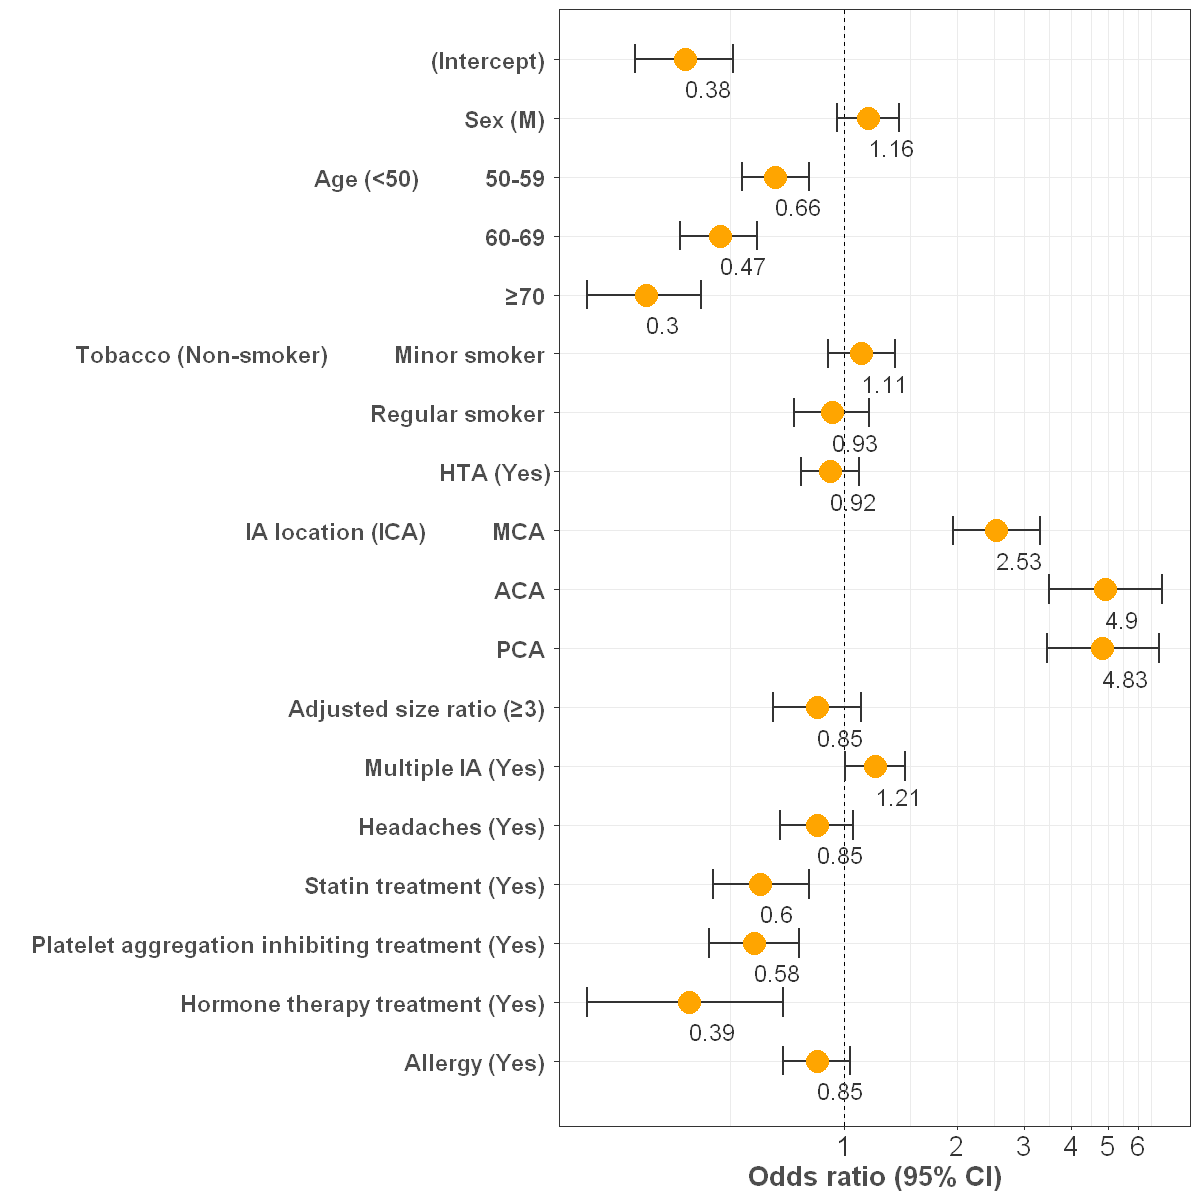

In [11]:
options(repr.plot.width = 10, repr.plot.height = 10)

p <- ggplot(df, aes(x = boxOdds, y = reorder(boxLabels, yAxis)))

p + geom_vline(aes(xintercept = 1), size = 0.5, linetype = "dashed") +
  geom_errorbarh(aes(xmax = boxCIHigh, xmin = boxCILow), size = 0.6, 
                 height = 0.5, color = "gray20") +
  geom_point(size = 6, color = "orange") +
  theme_bw()  +
  scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 7, 8)) +
  coord_trans(x = "log10") +
  ylab("") +
  xlab("Odds ratio (95% CI)") +
  annotate(geom = "text", y =17.5, x = Odds[1], label = Odds[1], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =16.5, x = Odds[2], label = Odds[2], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =15.5, x = Odds[3], label = Odds[3], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =14.5, x = Odds[4], label = Odds[4], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =13.5, x = Odds[5], label = Odds[5], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =12.5, x = Odds[6], label = Odds[6], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =11.5, x = Odds[7], label = Odds[7], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =10.5, x = Odds[8], label = Odds[8], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =9.5, x = Odds[9], label = Odds[9], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =8.5, x = Odds[10], label = Odds[10], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =7.5, x = Odds[11], label = Odds[11], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =6.5, x = Odds[12], label = Odds[12], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =5.5, x = Odds[13], label = Odds[13], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =4.5, x = Odds[14], label = Odds[14], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =3.5, x = Odds[15], label = Odds[15], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =2.5, x = Odds[16], label = Odds[16], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =1.5, x = Odds[17], label = Odds[17], size = 5, hjust = 0, col = "gray20") +
  annotate(geom = "text", y =0.5, x = Odds[18], label = Odds[18], size = 5, hjust = 0, col = "gray20") +

  theme(plot.title = element_text(face = "bold", colour = "gray20", size = 16, hjust = 0.5),
        axis.title.x = element_text(colour = "gray30", size = 16, face = "bold"),
        axis.text.y = element_text(color = "gray30", size= 14, face = "bold"),
        axis.text.x = element_text(color = "gray20", size= 16))